# Characterizing a Quantum Battery in Quantum Inspire

Date of data achieved: 2/12/2023
Milou van Nederveen
Starmon-5 by Quantum Inspire

In [1]:
from quantuminspire.credentials import save_account
save_account('API')

In [19]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt


#QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

from qiskit import QuantumCircuit

#authentication = get_authentication()
#QI.set_authentication(authentication, QI_URL)

#backend = QI.get_backend('Starmon-5')

font = {'family':'serif','size':12}

In [20]:
def finding_value(counts,qubit):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/1024

In [53]:
from fractions import Fraction
import matplotlib.ticker as ticker

#function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'


In [22]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
qubit=0
data_q0=[]

for t in theta:
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr,cr)
    
    qc.rx(t,qubit)
    qc.measure(qr[qubit],cr[qubit])
    
    job = backend.run(qc,shots)
    counts = job.result().get_counts()
    
    y = finding_value(counts,qubit,shots)
    y_values.append(y)

data_q0.append(y_values)

In [112]:
data_q0=[[0.0625, 0.068359375, 0.1083984375, 0.1689453125, 0.197265625, 0.279296875, 0.3681640625, 0.4912109375, 0.5634765625, 0.65234375, 0.7529296875, 0.8564453125, 0.8798828125, 0.927734375, 0.9755859375, 0.982421875], [0.0546875, 0.0576171875, 0.109375, 0.1826171875, 0.2060546875, 0.2509765625, 0.37890625, 0.4443359375, 0.6005859375, 0.6630859375, 0.7578125, 0.8515625, 0.8955078125, 0.94921875, 0.966796875, 0.97265625], [0.06640625, 0.0615234375, 0.115234375, 0.1728515625, 0.2216796875, 0.2607421875, 0.369140625, 0.4716796875, 0.5703125, 0.671875, 0.7490234375, 0.83203125, 0.86328125, 0.927734375, 0.95703125, 0.974609375], [0.0556640625, 0.076171875, 0.1123046875, 0.1376953125, 0.2021484375, 0.26953125, 0.375, 0.4443359375, 0.57421875, 0.6630859375, 0.7509765625, 0.8603515625, 0.85546875, 0.9306640625, 0.9619140625, 0.9765625], [0.0546875, 0.0732421875, 0.1298828125, 0.1611328125, 0.208984375, 0.26171875, 0.3798828125, 0.4853515625, 0.5908203125, 0.6533203125, 0.7626953125, 0.8349609375, 0.8818359375, 0.9296875, 0.9560546875, 0.9736328125], [0.052734375, 0.05859375, 0.1181640625, 0.140625, 0.21484375, 0.28515625, 0.3359375, 0.4677734375, 0.59765625, 0.677734375, 0.75390625, 0.8330078125, 0.861328125, 0.9326171875, 0.95703125, 0.97265625], [0.0615234375, 0.0673828125, 0.12109375, 0.1728515625, 0.2177734375, 0.27734375, 0.373046875, 0.470703125, 0.5419921875, 0.6884765625, 0.767578125, 0.8310546875, 0.8681640625, 0.9345703125, 0.970703125, 0.9658203125], [0.0634765625, 0.06640625, 0.12109375, 0.1640625, 0.1962890625, 0.27734375, 0.353515625, 0.4423828125, 0.5732421875, 0.6611328125, 0.7822265625, 0.8603515625, 0.88671875, 0.9443359375, 0.9716796875, 0.97265625], [0.0615234375, 0.064453125, 0.10546875, 0.18359375, 0.1904296875, 0.2646484375, 0.3779296875, 0.4453125, 0.5517578125, 0.6728515625, 0.7666015625, 0.833984375, 0.8837890625, 0.923828125, 0.9541015625, 0.982421875], [0.05859375, 0.076171875, 0.119140625, 0.15625, 0.19921875, 0.279296875, 0.3544921875, 0.4453125, 0.5849609375, 0.6796875, 0.7587890625, 0.8310546875, 0.8857421875, 0.9267578125, 0.9560546875, 0.96875]]

In [113]:
print(data_q0)

[[0.0625, 0.068359375, 0.1083984375, 0.1689453125, 0.197265625, 0.279296875, 0.3681640625, 0.4912109375, 0.5634765625, 0.65234375, 0.7529296875, 0.8564453125, 0.8798828125, 0.927734375, 0.9755859375, 0.982421875], [0.0546875, 0.0576171875, 0.109375, 0.1826171875, 0.2060546875, 0.2509765625, 0.37890625, 0.4443359375, 0.6005859375, 0.6630859375, 0.7578125, 0.8515625, 0.8955078125, 0.94921875, 0.966796875, 0.97265625], [0.06640625, 0.0615234375, 0.115234375, 0.1728515625, 0.2216796875, 0.2607421875, 0.369140625, 0.4716796875, 0.5703125, 0.671875, 0.7490234375, 0.83203125, 0.86328125, 0.927734375, 0.95703125, 0.974609375], [0.0556640625, 0.076171875, 0.1123046875, 0.1376953125, 0.2021484375, 0.26953125, 0.375, 0.4443359375, 0.57421875, 0.6630859375, 0.7509765625, 0.8603515625, 0.85546875, 0.9306640625, 0.9619140625, 0.9765625], [0.0546875, 0.0732421875, 0.1298828125, 0.1611328125, 0.208984375, 0.26171875, 0.3798828125, 0.4853515625, 0.5908203125, 0.6533203125, 0.7626953125, 0.8349609375, 0

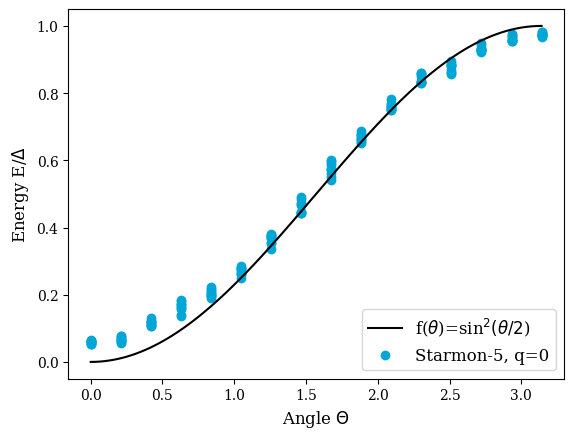

In [114]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data_q0)):
    plt.scatter(theta,data_q0[i],color=tud_color)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()

In [15]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 20
shots = 1024
y_values = []
data_q01=[]
qubit=0

for t in theta:
    qr = QuantumRegister(5)
    cr = ClassicalRegister(5)
    qc = QuantumCircuit(qr,cr)
    
    qc.rx(t,qubit)
    qc.measure(qr[qubit],cr[qubit])
    
    job = backend.run(qc,shots)
    counts = job.result().get_counts()
    
    y = finding_value(counts,qubit,shots)
    y_values.append(y)

data_q01.append(y_values)

In [110]:
#experimental values
data_q01=[[0.0595703125, 0.0732421875, 0.111328125, 0.158203125, 0.1865234375, 0.271484375, 0.361328125, 0.474609375, 0.5830078125, 0.642578125, 0.78125, 0.8310546875, 0.8662109375, 0.921875, 0.9638671875, 0.974609375], [0.0693359375, 0.05078125, 0.09765625, 0.1728515625, 0.2197265625, 0.2724609375, 0.359375, 0.4638671875, 0.578125, 0.6943359375, 0.779296875, 0.84375, 0.876953125, 0.9228515625, 0.9609375, 0.970703125], [0.0712890625, 0.0654296875, 0.115234375, 0.1611328125, 0.1806640625, 0.29296875, 0.34375, 0.474609375, 0.5966796875, 0.650390625, 0.75390625, 0.859375, 0.875, 0.9326171875, 0.9755859375, 0.9765625], [0.0595703125, 0.0771484375, 0.0966796875, 0.12109375, 0.21484375, 0.2724609375, 0.3642578125, 0.4521484375, 0.580078125, 0.6650390625, 0.751953125, 0.8505859375, 0.8603515625, 0.9267578125, 0.9521484375, 0.96875], [0.08984375, 0.0791015625, 0.099609375, 0.1455078125, 0.189453125, 0.2568359375, 0.3828125, 0.4697265625, 0.5830078125, 0.6787109375, 0.7578125, 0.853515625, 0.8935546875, 0.9326171875, 0.9609375, 0.9775390625], [0.0546875, 0.0859375, 0.11328125, 0.1728515625, 0.20703125, 0.2705078125, 0.35546875, 0.4912109375, 0.57421875, 0.671875, 0.798828125, 0.8349609375, 0.876953125, 0.93359375, 0.970703125, 0.9755859375], [0.06640625, 0.0634765625, 0.1083984375, 0.1630859375, 0.19140625, 0.2783203125, 0.3857421875, 0.482421875, 0.5654296875, 0.67578125, 0.7626953125, 0.84375, 0.8466796875, 0.9345703125, 0.9716796875, 0.984375], [0.0791015625, 0.076171875, 0.09375, 0.1611328125, 0.208984375, 0.25390625, 0.36328125, 0.4755859375, 0.5546875, 0.7021484375, 0.7587890625, 0.8359375, 0.87890625, 0.9365234375, 0.9677734375, 0.9775390625], [0.06640625, 0.0693359375, 0.1044921875, 0.1474609375, 0.1923828125, 0.2744140625, 0.3720703125, 0.4619140625, 0.59375, 0.681640625, 0.7626953125, 0.8544921875, 0.8759765625, 0.9326171875, 0.9619140625, 0.9814453125], [0.060546875, 0.0693359375, 0.1142578125, 0.1494140625, 0.201171875, 0.2626953125, 0.4033203125, 0.447265625, 0.578125, 0.6650390625, 0.7763671875, 0.8447265625, 0.8759765625, 0.9052734375, 0.9619140625, 0.9794921875]]

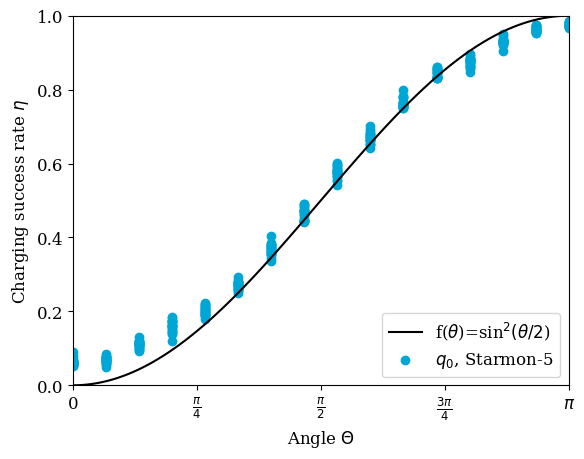

In [115]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

# Plot the original data and the function
for i in range(len(data_q0)):
    plt.scatter(theta,data_q0[i],color=tud_color)

for i in range(len(data_q01)):
    plt.scatter(theta,data_q01[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_0$, Starmon-5"], prop=font, loc="lower right")
plt.show()

In [116]:
data_tot=[]

#experimental values
data_tot=[[0.0625, 0.068359375, 0.1083984375, 0.1689453125, 0.197265625, 0.279296875, 0.3681640625, 0.4912109375, 0.5634765625, 0.65234375, 0.7529296875, 0.8564453125, 0.8798828125, 0.927734375, 0.9755859375, 0.982421875], [0.0546875, 0.0576171875, 0.109375, 0.1826171875, 0.2060546875, 0.2509765625, 0.37890625, 0.4443359375, 0.6005859375, 0.6630859375, 0.7578125, 0.8515625, 0.8955078125, 0.94921875, 0.966796875, 0.97265625], [0.06640625, 0.0615234375, 0.115234375, 0.1728515625, 0.2216796875, 0.2607421875, 0.369140625, 0.4716796875, 0.5703125, 0.671875, 0.7490234375, 0.83203125, 0.86328125, 0.927734375, 0.95703125, 0.974609375], [0.0556640625, 0.076171875, 0.1123046875, 0.1376953125, 0.2021484375, 0.26953125, 0.375, 0.4443359375, 0.57421875, 0.6630859375, 0.7509765625, 0.8603515625, 0.85546875, 0.9306640625, 0.9619140625, 0.9765625], [0.0546875, 0.0732421875, 0.1298828125, 0.1611328125, 0.208984375, 0.26171875, 0.3798828125, 0.4853515625, 0.5908203125, 0.6533203125, 0.7626953125, 0.8349609375, 0.8818359375, 0.9296875, 0.9560546875, 0.9736328125], [0.052734375, 0.05859375, 0.1181640625, 0.140625, 0.21484375, 0.28515625, 0.3359375, 0.4677734375, 0.59765625, 0.677734375, 0.75390625, 0.8330078125, 0.861328125, 0.9326171875, 0.95703125, 0.97265625], [0.0615234375, 0.0673828125, 0.12109375, 0.1728515625, 0.2177734375, 0.27734375, 0.373046875, 0.470703125, 0.5419921875, 0.6884765625, 0.767578125, 0.8310546875, 0.8681640625, 0.9345703125, 0.970703125, 0.9658203125], [0.0634765625, 0.06640625, 0.12109375, 0.1640625, 0.1962890625, 0.27734375, 0.353515625, 0.4423828125, 0.5732421875, 0.6611328125, 0.7822265625, 0.8603515625, 0.88671875, 0.9443359375, 0.9716796875, 0.97265625], [0.0615234375, 0.064453125, 0.10546875, 0.18359375, 0.1904296875, 0.2646484375, 0.3779296875, 0.4453125, 0.5517578125, 0.6728515625, 0.7666015625, 0.833984375, 0.8837890625, 0.923828125, 0.9541015625, 0.982421875], [0.05859375, 0.076171875, 0.119140625, 0.15625, 0.19921875, 0.279296875, 0.3544921875, 0.4453125, 0.5849609375, 0.6796875, 0.7587890625, 0.8310546875, 0.8857421875, 0.9267578125, 0.9560546875, 0.96875], [0.0595703125, 0.0732421875, 0.111328125, 0.158203125, 0.1865234375, 0.271484375, 0.361328125, 0.474609375, 0.5830078125, 0.642578125, 0.78125, 0.8310546875, 0.8662109375, 0.921875, 0.9638671875, 0.974609375], [0.0693359375, 0.05078125, 0.09765625, 0.1728515625, 0.2197265625, 0.2724609375, 0.359375, 0.4638671875, 0.578125, 0.6943359375, 0.779296875, 0.84375, 0.876953125, 0.9228515625, 0.9609375, 0.970703125], [0.0712890625, 0.0654296875, 0.115234375, 0.1611328125, 0.1806640625, 0.29296875, 0.34375, 0.474609375, 0.5966796875, 0.650390625, 0.75390625, 0.859375, 0.875, 0.9326171875, 0.9755859375, 0.9765625], [0.0595703125, 0.0771484375, 0.0966796875, 0.12109375, 0.21484375, 0.2724609375, 0.3642578125, 0.4521484375, 0.580078125, 0.6650390625, 0.751953125, 0.8505859375, 0.8603515625, 0.9267578125, 0.9521484375, 0.96875], [0.08984375, 0.0791015625, 0.099609375, 0.1455078125, 0.189453125, 0.2568359375, 0.3828125, 0.4697265625, 0.5830078125, 0.6787109375, 0.7578125, 0.853515625, 0.8935546875, 0.9326171875, 0.9609375, 0.9775390625], [0.0546875, 0.0859375, 0.11328125, 0.1728515625, 0.20703125, 0.2705078125, 0.35546875, 0.4912109375, 0.57421875, 0.671875, 0.798828125, 0.8349609375, 0.876953125, 0.93359375, 0.970703125, 0.9755859375], [0.06640625, 0.0634765625, 0.1083984375, 0.1630859375, 0.19140625, 0.2783203125, 0.3857421875, 0.482421875, 0.5654296875, 0.67578125, 0.7626953125, 0.84375, 0.8466796875, 0.9345703125, 0.9716796875, 0.984375], [0.0791015625, 0.076171875, 0.09375, 0.1611328125, 0.208984375, 0.25390625, 0.36328125, 0.4755859375, 0.5546875, 0.7021484375, 0.7587890625, 0.8359375, 0.87890625, 0.9365234375, 0.9677734375, 0.9775390625], [0.06640625, 0.0693359375, 0.1044921875, 0.1474609375, 0.1923828125, 0.2744140625, 0.3720703125, 0.4619140625, 0.59375, 0.681640625, 0.7626953125, 0.8544921875, 0.8759765625, 0.9326171875, 0.9619140625, 0.9814453125], [0.060546875, 0.0693359375, 0.1142578125, 0.1494140625, 0.201171875, 0.2626953125, 0.4033203125, 0.447265625, 0.578125, 0.6650390625, 0.7763671875, 0.8447265625, 0.8759765625, 0.9052734375, 0.9619140625, 0.9794921875]]
#for your values, use data_tot.append("dataset")
data_T=np.array(data_tot)
data=data_T.transpose()
print(data)

[[0.0625     0.0546875  0.06640625 0.05566406 0.0546875  0.05273438
  0.06152344 0.06347656 0.06152344 0.05859375 0.05957031 0.06933594
  0.07128906 0.05957031 0.08984375 0.0546875  0.06640625 0.07910156
  0.06640625 0.06054688]
 [0.06835938 0.05761719 0.06152344 0.07617188 0.07324219 0.05859375
  0.06738281 0.06640625 0.06445312 0.07617188 0.07324219 0.05078125
  0.06542969 0.07714844 0.07910156 0.0859375  0.06347656 0.07617188
  0.06933594 0.06933594]
 [0.10839844 0.109375   0.11523438 0.11230469 0.12988281 0.11816406
  0.12109375 0.12109375 0.10546875 0.11914062 0.11132812 0.09765625
  0.11523438 0.09667969 0.09960938 0.11328125 0.10839844 0.09375
  0.10449219 0.11425781]
 [0.16894531 0.18261719 0.17285156 0.13769531 0.16113281 0.140625
  0.17285156 0.1640625  0.18359375 0.15625    0.15820312 0.17285156
  0.16113281 0.12109375 0.14550781 0.17285156 0.16308594 0.16113281
  0.14746094 0.14941406]
 [0.19726562 0.20605469 0.22167969 0.20214844 0.20898438 0.21484375
  0.21777344 0.196289

In [88]:
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 

In [89]:
print(mean_values)

[0.063427734375, 0.068994140625, 0.1107421875, 0.15966796875, 0.20234375, 0.27060546875, 0.36787109375, 0.465087890625, 0.576806640625, 0.670556640625, 0.764306640625, 0.84384765625, 0.8744140625, 0.930322265625, 0.963720703125, 0.975439453125]


In [90]:
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

In [91]:
std_dev

[0.0087753528056719,
 0.00820123559900225,
 0.009026734381477611,
 0.015361858923799768,
 0.01155731909898915,
 0.01040348490501838,
 0.015088127652871177,
 0.016010488291149802,
 0.015395268548182404,
 0.014704563698831668,
 0.012745075995367212,
 0.010777197919455557,
 0.01230778730795949,
 0.008648369352077372,
 0.007037181471667868,
 0.004865937637349678]

In [92]:
#from scipy.stats import sem
#std_err=[]

#for t in range(len(theta)):
#    std_err.append(sem(data[t]))
                   
#print(std_err)

In [93]:
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t], ddof=1) / np.sqrt(np.size(data[t])))

In [94]:
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
    
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 

print("Minimum values")
print(min_values)
print("Maximum values")
print(max_values)

Minimum values
[0.052734375, 0.05078125, 0.09375, 0.12109375, 0.1806640625, 0.2509765625, 0.3359375, 0.4423828125, 0.5419921875, 0.642578125, 0.7490234375, 0.8310546875, 0.8466796875, 0.9052734375, 0.9521484375, 0.9658203125]
Maximum values
[0.08984375, 0.0859375, 0.1298828125, 0.18359375, 0.2216796875, 0.29296875, 0.4033203125, 0.4912109375, 0.6005859375, 0.7021484375, 0.798828125, 0.8603515625, 0.8955078125, 0.94921875, 0.9755859375, 0.984375]


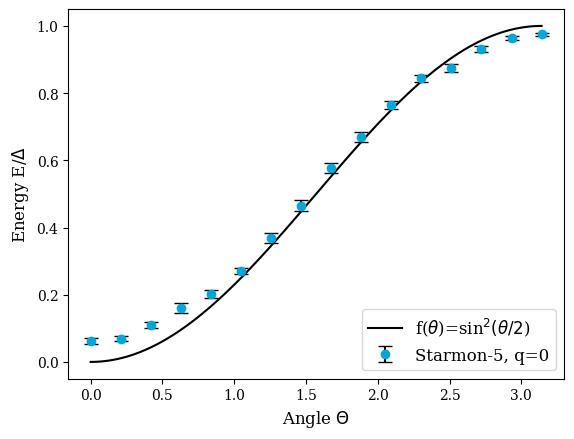

<Figure size 640x480 with 0 Axes>

In [95]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_dev, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-stdev.png')


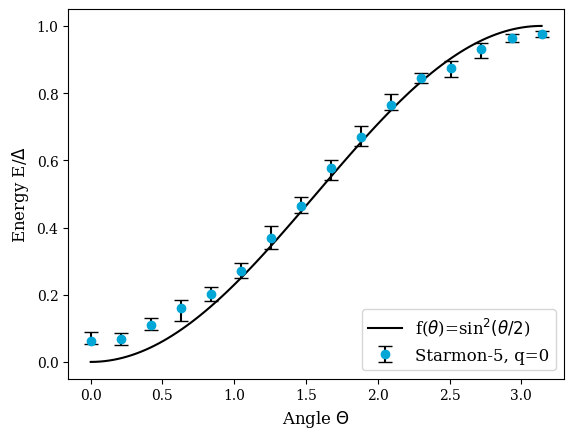

<Figure size 640x480 with 0 Axes>

In [96]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=[np.array(mean_values) - np.array(min_values), np.array(max_values) - np.array(mean_values)], fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-minmax.png')

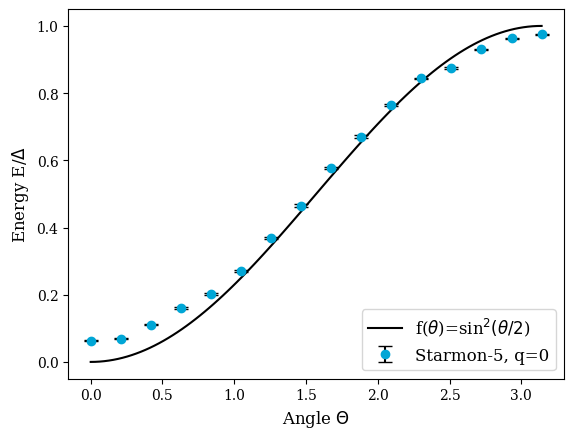

<Figure size 640x480 with 0 Axes>

In [97]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')
#plt.scatter(theta, mean_values,color=tud_color)

#plot error bars with stdev here
plt.errorbar(theta, mean_values, yerr=std_err, fmt='o', color=tud_color, ecolor='black', capsize=5)

plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "Starmon-5, q=0"], prop=font, loc="lower right")
plt.show()
plt.savefig('starmon-5-q0-error-stdev.png')

# Curve fitting

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [99]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [100]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [101]:
print(fit_a)
print(fit_b)

0.9582900003897831
0.12457532854515764


In [102]:
fit_a=0.9582900003897831
fit_b=0.12457532854515764

In [103]:
x_func = np.linspace(min(theta), max(theta), 1000)

In [104]:
x_func = np.linspace(min(theta), max(theta), 1000)
fit_sin2 = sin2_func(x_func, fit_a, fit_b)

In [105]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.95829 with standard error of 0.00522.
The value of phi is 0.12458 with standard error of 0.02902.


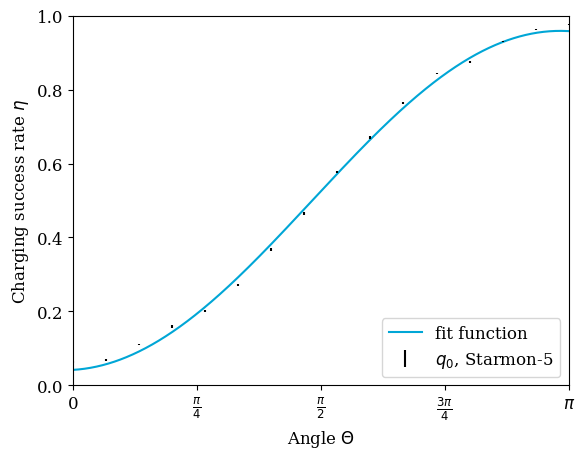

In [106]:

plt.plot(x_func, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xticks(font=font)
plt.yticks(font=font)


plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)
plt.legend(["fit function", "$q_0$, Starmon-5"], prop=font, loc="lower right")

plt.savefig('starmon-5-q0-fit.png')